<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/UTS/Tabular%20Task/UTS_RegresiUTSTelkom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
from tabulate import tabulate

In [2]:
data = pd.read_csv('drive/MyDrive/dataset_tabular/RegresiUTSTelkom.csv')

data.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [ ]:
data.duplicated().sum()

np.int64(214)

In [3]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isnull().sum()

,0
2001,0
49.94357,0
21.47114,0
73.0775,0
8.74861,0
...,...
-23.08793,0
68.40795,0
-1.82223,0
-27.46348,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515130 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515130 non-null  int64  
 1   49.94357    515130 non-null  float64
 2   21.47114    515130 non-null  float64
 3   73.0775     515130 non-null  float64
 4   8.74861     515130 non-null  float64
 5   -17.40628   515130 non-null  float64
 6   -13.09905   515130 non-null  float64
 7   -25.01202   515130 non-null  float64
 8   -12.23257   515130 non-null  float64
 9   7.83089     515130 non-null  float64
 10  -2.46783    515130 non-null  float64
 11  3.32136     515130 non-null  float64
 12  -2.31521    515130 non-null  float64
 13  10.20556    515130 non-null  float64
 14  611.10913   515130 non-null  float64
 15  951.0896    515130 non-null  float64
 16  698.11428   515130 non-null  float64
 17  408.98485   515130 non-null  float64
 18  383.70912   515130 non-null  float64
 19  326.515

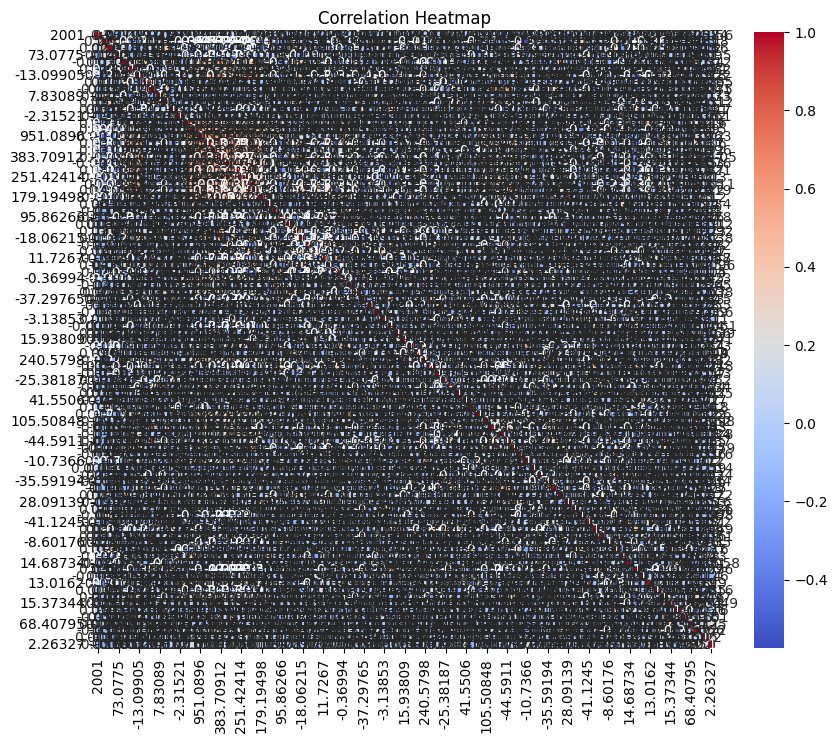

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [4]:
# Misal X adalah DataFrame
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cek apakah nilai di luar batas
outliers = ((data < lower_bound) | (data > upper_bound))

# Hitung jumlah outlier per kolom
outliers.sum()

,0
2001,29695
49.94357,10620
21.47114,14641
73.0775,15626
8.74861,22677
...,...
-23.08793,33863
68.40795,32695
-1.82223,30390
-27.46348,39134


In [5]:
data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179433 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        179433 non-null  int64  
 1   49.94357    179433 non-null  float64
 2   21.47114    179433 non-null  float64
 3   73.0775     179433 non-null  float64
 4   8.74861     179433 non-null  float64
 5   -17.40628   179433 non-null  float64
 6   -13.09905   179433 non-null  float64
 7   -25.01202   179433 non-null  float64
 8   -12.23257   179433 non-null  float64
 9   7.83089     179433 non-null  float64
 10  -2.46783    179433 non-null  float64
 11  3.32136     179433 non-null  float64
 12  -2.31521    179433 non-null  float64
 13  10.20556    179433 non-null  float64
 14  611.10913   179433 non-null  float64
 15  951.0896    179433 non-null  float64
 16  698.11428   179433 non-null  float64
 17  408.98485   179433 non-null  float64
 18  383.70912   179433 non-null  float64
 19  326.515

In [6]:
data = data.sample(frac=0.01, random_state=42)

In [ ]:
data.describe()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,...,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000
mean,1999.919175,47.019682,17.568895,17.144165,-2.756965,-10.978533,-14.572788,-1.463966,-2.315799,5.198147,...,6.371763,-44.265955,17.405885,31.244458,1.801490,13.142273,-21.587240,2.278328,2.461637,-0.962614
std,8.066694,4.305510,34.993983,23.917811,9.344229,18.832832,8.795215,10.900354,5.797550,8.019901,...,15.177144,81.312118,59.305247,44.756603,8.882129,52.701610,86.140931,6.929717,77.653453,10.498615
min,1976.000000,29.246860,-110.647680,-70.653850,-33.484990,-62.523890,-35.580560,-35.490070,-19.872960,-19.949200,...,-42.301620,-348.231220,-173.368100,-121.419560,-29.455640,-179.352940,-328.065010,-19.776320,-273.582940,-36.515210
25%,1995.000000,44.447142,-1.962342,2.291445,-9.097608,-23.401643,-20.928270,-8.223133,-6.156638,-0.227270,...,-2.729650,-89.184495,-18.681095,3.552730,-3.430015,-18.174247,-73.464517,-1.947230,-44.476515,-6.942770
50%,2002.000000,47.766945,20.574445,18.184230,-3.213250,-10.450145,-15.652255,-1.093625,-2.060735,5.336150,...,4.290870,-37.265320,16.241720,27.731465,1.392875,10.868420,-17.359170,2.007950,1.943095,-0.829315
75%,2006.000000,50.292882,41.895907,32.664550,3.008888,1.872590,-9.025697,5.253233,1.563505,10.580485,...,13.911970,5.343153,52.732588,58.317255,6.581380,43.109820,30.406380,6.063923,45.456652,4.932450
max,2010.000000,56.433660,129.295370,88.224370,31.319930,49.985330,16.163460,32.427880,16.876570,27.357010,...,67.952700,219.044770,250.419590,190.793510,30.698900,206.914240,281.983590,28.584670,301.123100,35.650520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 51347 to 11021
Data columns (total 91 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2001        1794 non-null   int64  
 1   49.94357    1794 non-null   float64
 2   21.47114    1794 non-null   float64
 3   73.0775     1794 non-null   float64
 4   8.74861     1794 non-null   float64
 5   -17.40628   1794 non-null   float64
 6   -13.09905   1794 non-null   float64
 7   -25.01202   1794 non-null   float64
 8   -12.23257   1794 non-null   float64
 9   7.83089     1794 non-null   float64
 10  -2.46783    1794 non-null   float64
 11  3.32136     1794 non-null   float64
 12  -2.31521    1794 non-null   float64
 13  10.20556    1794 non-null   float64
 14  611.10913   1794 non-null   float64
 15  951.0896    1794 non-null   float64
 16  698.11428   1794 non-null   float64
 17  408.98485   1794 non-null   float64
 18  383.70912   1794 non-null   float64
 19  326.51512   1794 non-null  

In [7]:
# Menghitung matriks korelasi antar kolom
correlation_matrix = data.corr()

# Mengambil korelasi antara kolom pertama (kolom ke-0) dan fitur lainnya
correlation_with_first_column = correlation_matrix.iloc[0]

# Menghapus korelasi fitur dengan dirinya sendiri (korelasi diagonal)
correlation_with_first_column = correlation_with_first_column.drop(correlation_with_first_column.index[0])

# Menentukan threshold korelasi (misalnya > 0.05)
threshold = 0.05

# Memilih fitur yang memiliki korelasi lebih besar dari threshold secara positif
selected_features = correlation_with_first_column[correlation_with_first_column > threshold].index

# Menampilkan fitur yang berkorelasi positif dengan kolom pertama
print("Fitur yang berkorelasi positif dengan kolom pertama:", selected_features)


Fitur yang berkorelasi positif dengan kolom pertama: Index(['49.94357', '-2.46783', '238.11327', '-8.41558', '15.93809', '-7.26272',
       '64.29856', '7.19877', '-8.60176', '-5.90857', '58.99367', '15.37344',
       '1.11144'],
      dtype='object')


In [13]:
selected_feature = ['49.94357', '-2.46783', '238.11327', '-8.41558', '15.93809', '-7.26272',
       '64.29856', '7.19877', '-8.60176', '-5.90857', '58.99367', '15.37344',
       '1.11144']
y = data['2001']           # Kolom pertama sebagai target
X = data[selected_feature]      # Kolom sisanya sebagai fitur

In [ ]:
data_gab = pd.concat([X, y], axis=1)

In [ ]:
data_gab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 51347 to 11021
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   49.94357    1794 non-null   float64
 1   73.0775     1794 non-null   float64
 2   8.74861     1794 non-null   float64
 3   -13.09905   1794 non-null   float64
 4   3.32136     1794 non-null   float64
 5   1.96984     1794 non-null   float64
 6   11.7267     1794 non-null   float64
 7   -133.67852  1794 non-null   float64
 8   -37.36684   1794 non-null   float64
 9   -24.21531   1794 non-null   float64
 10  -10.7366    1794 non-null   float64
 11  58.99367    1794 non-null   float64
 12  -1.82223    1794 non-null   float64
 13  2001        1794 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 274.8 KB


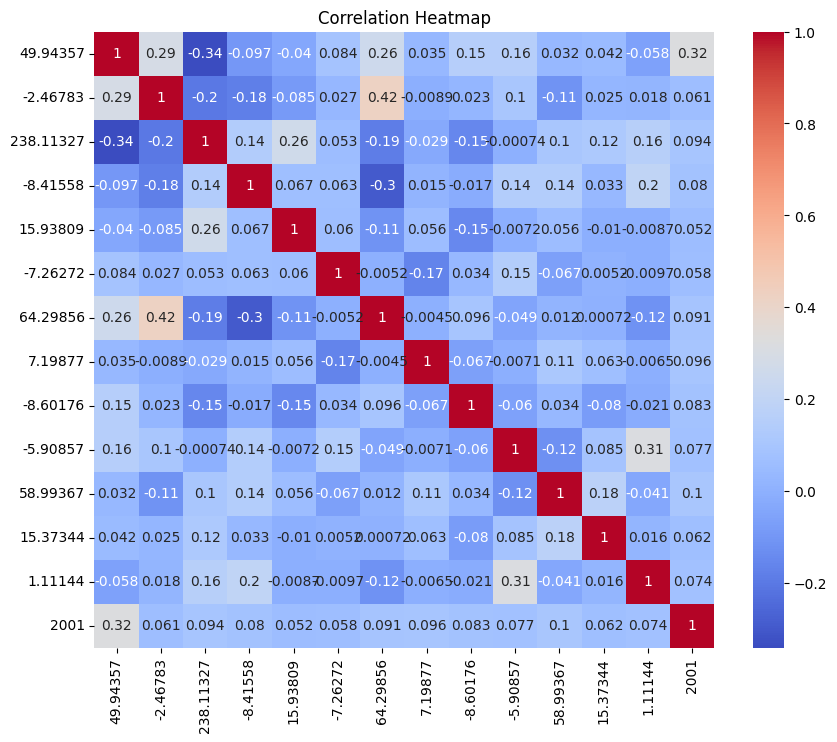

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_gab.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
Counter(y)

Counter({1995: 40,
         2010: 34,
         1989: 24,
         1997: 61,
         2000: 62,
         1991: 39,
         2008: 127,
         2005: 123,
         2001: 76,
         1986: 16,
         2006: 154,
         2002: 77,
         2009: 118,
         2007: 128,
         1998: 62,
         2003: 94,
         1996: 58,
         1979: 13,
         1990: 21,
         1983: 13,
         1993: 46,
         1984: 14,
         1999: 70,
         1987: 25,
         1988: 17,
         1992: 30,
         1978: 17,
         1994: 51,
         2004: 100,
         1982: 21,
         1977: 15,
         1985: 24,
         1981: 12,
         1980: 9,
         1976: 3})

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [ ]:
X_train

,13.29258,-44.5911,7.93706,-10.7366,6.02015,7.19877,13.0162,58.99367,1.11144,-1.82223
508971,-54.15955,-80.70034,-24.57241,22.79520,1.95044,-8.31597,22.30810,-74.80578,7.11839,6.33860
422397,58.94912,-92.80596,33.82037,4.63913,-4.71585,-46.65976,14.50673,55.44536,8.21344,0.97193
501463,6.21020,-86.22658,-22.53767,-3.52058,-4.52092,-20.66703,-14.26886,-62.13405,6.01411,12.94557
352933,4.64402,-40.87100,-11.32823,-1.13164,11.93064,7.87388,4.98086,-13.84517,5.64185,2.17658
135327,-8.63150,19.39730,-3.10719,-33.33651,5.78131,-23.29107,26.92556,20.55614,-15.18468,12.53236
...,...,...,...,...,...,...,...,...,...,...
20452,-0.17626,-55.00644,-32.10476,-9.65259,-1.75720,-40.70924,20.62185,26.95807,8.48938,-0.62370
412515,62.87986,-75.33868,26.45470,-5.97748,-11.95304,58.30131,20.72357,110.86124,2.53739,24.25490
377674,11.90474,-37.69084,-16.41917,-16.84923,-4.23506,-0.39963,20.32272,-12.18813,12.77476,3.00377
458758,17.48691,41.84787,10.11459,-15.19314,-0.28641,-5.72525,-8.04037,18.75330,-2.28515,-0.30942


In [15]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Buat scaler khusus untuk y
y_scaler = RobustScaler()

# Standardisasi y_train
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()

# Standardisasi y_test (pakai transform saja)
y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
# y_train = np.log(y_train + 1)
# y_test = np.log(y_test + 1)

In [17]:
X_train.shape

(1435, 13)

In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

# Definisikan fungsi model untuk tuning
def build_model(hp):
    # Input Layer
    inputs = layers.Input(shape=(X_train.shape[1],))

    # Hidden Layer 1
    hidden = layers.Dense(
        hp.Int('units_1', min_value=64, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(0.001)
    )(inputs)
    hidden = layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1))(hidden)

    # Hidden Layer 2
    hidden = layers.Dense(
        hp.Int('units_2', min_value=64, max_value=128, step=32),
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(0.001)
    )(hidden)
    hidden = layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1))(hidden)

    # Hidden Layer 3
    hidden = layers.Dense(
        hp.Int('units_3', min_value=32, max_value=64, step=16),
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(0.001)
    )(hidden)
    hidden = layers.Dropout(hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1))(hidden)

    # Output Layer
    outputs = layers.Dense(1, activation='linear')(hidden)

    # Build the model
    model = Model(inputs, outputs)

    # Compile the model with an Adam optimizer and tuning learning rate
    model.compile(
        optimizer=optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')
        ),
        loss='mse',
        metrics=['accuracy']
    )

    return model

In [ ]:
# Inisialisasi Keras Tuner menggunakan RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',  # Target yang ingin diminimalkan
    max_trials=10,  # Berapa banyak kombinasi hyperparameter yang dicoba
    executions_per_trial=2,  # Berapa kali setiap konfigurasi diulang
    directory='my_dir',  # Direktori untuk menyimpan hasil
    project_name='tune_model'
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melakukan pencarian hyperparameter
tuner.search(
    X_train,
    y_train,
    epochs=1000,
    validation_split=0.15,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Menampilkan hasil pencarian terbaik
best_model = tuner.get_best_models(num_models=1)[0]
print("Best Hyperparameters:", tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values)

Trial 10 Complete [00h 00m 35s]
val_loss: 0.566676527261734

Best val_loss So Far: 0.5605702698230743
Total elapsed time: 00h 19m 07s
Best Hyperparameters: {'units_1': 256, 'dropout_1': 0.4, 'units_2': 96, 'dropout_2': 0.2, 'units_3': 32, 'dropout_3': 0.30000000000000004, 'learning_rate': 0.000949583452397775}


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [18]:
inputs = tf.keras.Input(shape=(X_train.shape[1], ))

# Hidden Layer 1
hidden = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
hidden = tf.keras.layers.Dropout(0.4)(hidden)

# Hidden Layer 2
hidden = tf.keras.layers.Dense(96, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(hidden)
hidden = tf.keras.layers.Dropout(0.2)(hidden)

# Hidden Layer 3
hidden = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(hidden)
hidden = tf.keras.layers.Dropout(0.3)(hidden)

# Output Layer
outputs = tf.keras.layers.Dense(1, activation='linear')(hidden)

# Compile model with learning rate from hyperparameter tuning
tf_model = tf.keras.Model(inputs, outputs)

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00049)
tf_model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['accuracy']
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit model
history = tf_model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    batch_size=32,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0471 - loss: 0.9111 - val_accuracy: 0.0556 - val_loss: 0.8361
Epoch 2/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0342 - loss: 0.8327 - val_accuracy: 0.0556 - val_loss: 0.7848
Epoch 3/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0508 - loss: 0.8084 - val_accuracy: 0.0556 - val_loss: 0.7824
Epoch 4/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0521 - loss: 0.7987 - val_accuracy: 0.0556 - val_loss: 0.7660
Epoch 5/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0488 - loss: 0.7887 - val_accuracy: 0.0556 - val_loss: 0.7492
Epoch 6/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0361 - loss: 0.7424 - val_accuracy: 0.0556 - val_loss: 0.7378
Epoch 7/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0406 - loss: 0.7754 - val_accuracy: 0.0556 - val_loss: 0.7287
Epoch 8/1000
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0441 - loss: 0.7425 - val_accuracy: 0

In [19]:
# Prediksi pada data uji
y_pred_tf = tf_model.predict(X_test)

# Hitung MSE dan kemudian RMSE
from sklearn.metrics import mean_squared_error
tf_mse = mean_squared_error(y_test, y_pred_tf)
tf_rmse = np.sqrt(tf_mse)

# Hitung R-Square
tf_r2 = r2_score(y_test, y_pred_tf)

print(f"RMSE: {tf_rmse:.4f}")
print(f"R²: {tf_r2:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE: 0.7540
R²: 0.1298


In [20]:
tf_rmse

np.float64(0.7540420758657155)

In [21]:
y_test.min(), y_test.max()

(np.float64(-2.6), np.float64(0.8))

In [22]:
# Invers transform
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_tf = y_scaler.inverse_transform(y_pred_tf.reshape(-1, 1)).flatten()

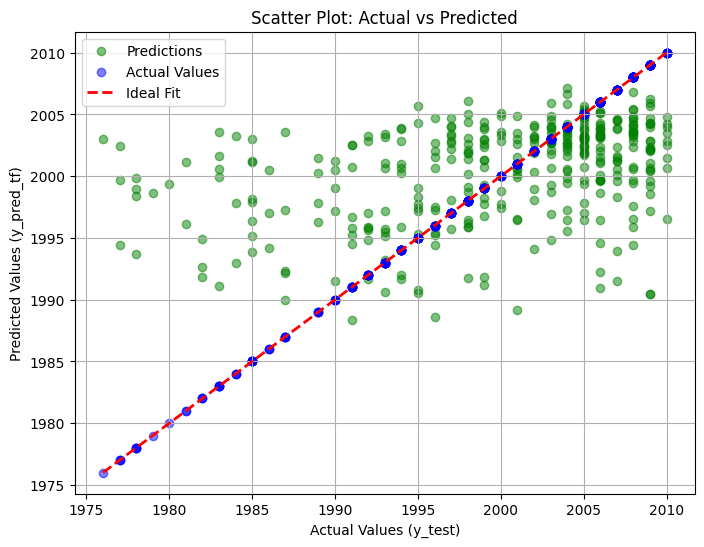

In [23]:
plt.figure(figsize=(8, 6))

# Ubah warna prediksi menjadi hijau, sedangkan actual tetap biru
plt.scatter(y_test, y_pred_tf, alpha=0.5, color='green', label='Predictions')
plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Actual Values')

# Garis ideal (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linestyle='--', linewidth=2, label='Ideal Fit')

# Label dan judul
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_tf)")
plt.title("Scatter Plot: Actual vs Predicted")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


In [ ]:
tf_r2 = r2_score(y_test, y_pred_tf)

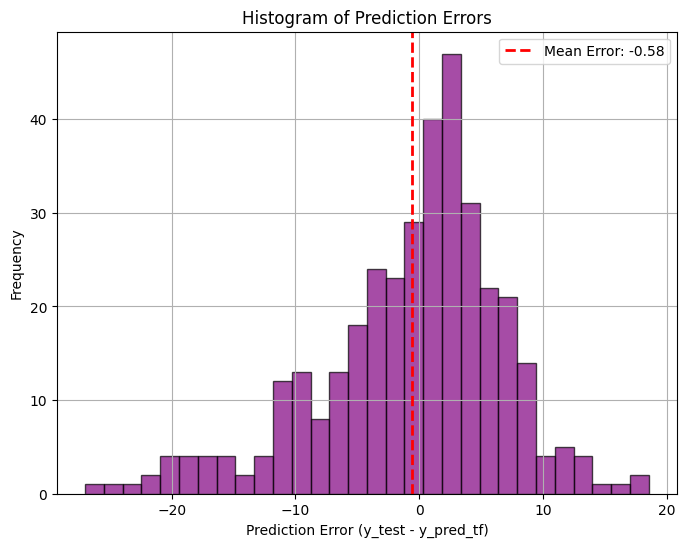

In [24]:
# Pastikan y_test dan y_pred_tf berbentuk array 1D
y_test_np = y_test.flatten()
y_pred_np = y_pred_tf.flatten()

# Hitung error (selisih antara y_test dan y_pred_tf)
errors = y_test_np - y_pred_np  # Harus berbentuk array 1D

# Buat histogram error
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='purple', alpha=0.7, edgecolor='black')

# Tambahkan garis rata-rata error
plt.axvline(np.mean(errors), color='red', linestyle='dashed', linewidth=2, label=f'Mean Error: {np.mean(errors):.2f}')

# Label dan judul
plt.xlabel("Prediction Error (y_test - y_pred_tf)")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


In [25]:
print('----------Hasil RMSE----------'.center(50))
print(f'Hasil RMSE Tensorflow: {tf_rmse}')
print()
print('----------Hasil RSquared----------'.center(50))
print(f'Hasil RSquared Tensorflow: {tf_r2}')

          ----------Hasil RMSE----------          
Hasil RMSE Tensorflow: 0.7540420758657155

        ----------Hasil RSquared----------        
Hasil RSquared Tensorflow: 0.1297983598979393


## **1. Penjelasan Persamaan Matematika**

Sebelum membandingkan hasil model, berikut adalah rumus matematika dari metrik evaluasi yang digunakan:

### **Mean Squared Error (MSE)**
MSE mengukur rata-rata kuadrat selisih antara nilai prediksi $ (\hat{y}_i) $ dan nilai aktual $ (y_i) $:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

### **Root Mean Squared Error (RMSE)**
RMSE adalah akar dari MSE dan memberikan gambaran tentang kesalahan dalam satuan yang sama dengan data:

$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Semakin kecil nilai RMSE, semakin baik model dalam memprediksi data.

### **R-Squared $ (R^2) $**
R-Squared mengukur seberapa baik model menjelaskan variabilitas data. Rumusnya:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

di mana:
- $ \bar{y} $ adalah rata-rata dari nilai aktual.

Nilai $ R^2 $ berkisar antara **0 hingga 1**. Semakin mendekati 1, semakin baik model menjelaskan varians data.

---

## **2. Hasil Model**

<div align="center">

| Metrik  | TensorFlow |
|---------|------------|
| **RMSE** | 0.7504    |
| **R²**   | 0.1297    |

</div>

### **Kesimpulan**
Berdasarkan hasil evaluasi:
- **RMSE** sangat besar jika dibandingkan rentang dari y_test.
- **R²** sangat kecil bahkan tidak sampai 0.15

Dengan demikian, model ini sangat buruk.